<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20K-NN%20-%20LSTM%20for%205%20class%20classifications%20based%20on%20WSN-DS%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hybrid K-NN - LSTM for 5 class classifications based on WSN-DS dataset**

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")
dataset.shape
dataset.isnull().sum()
dataset.info()
dataset["Class"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

array([0, 4, 3, 1, 2])

**Data preprocessing**

In [3]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'], axis=1)
X = X.values

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Data balancing using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [5]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**K-NN Model**

In [6]:
# Train the K-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

# Obtain predictions from the K-NN classifier
knn_pred = knn_model.predict(X_test)

In [ ]:
##from sklearn.preprocessing import StandardScaler
    # Standardize the features
##scaler = StandardScaler()
##X_train = scaler.fit_transform(X_train)
##X_test = scaler.transform(X_test)

In [ ]:
    # Reshape the data for LSTM
##X = X.reshape(X.shape[0], X.shape[1], 1)

**LSTM Model**

In [7]:
from keras.utils import to_categorical
# Reshape the input data for LSTM (assuming you want to consider a single feature)
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert class labels to categorical representation
num_classes = len(np.unique(y))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(num_classes, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_categorical, epochs=10, batch_size=64)

# Obtain predictions from the LSTM model
lstm_pred = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

Epoch 1/10
21255/21255 [==============================] - 357s 17ms/step - loss: 0.1929 - accuracy: 0.9048
Epoch 2/10
21255/21255 [==============================] - 348s 16ms/step - loss: 0.1605 - accuracy: 0.9235
Epoch 3/10
21255/21255 [==============================] - 347s 16ms/step - loss: 0.0998 - accuracy: 0.9690
Epoch 4/10
21255/21255 [==============================] - 348s 16ms/step - loss: 0.0764 - accuracy: 0.9752
Epoch 5/10
21255/21255 [==============================] - 348s 16ms/step - loss: 0.0668 - accuracy: 0.9776
Epoch 6/10
21255/21255 [==============================] - 346s 16ms/step - loss: 0.0619 - accuracy: 0.9791
Epoch 7/10
21255/21255 [==============================] - 347s 16ms/step - loss: 0.0589 - accuracy: 0.9801
Epoch 8/10
21255/21255 [==============================] - 348s 16ms/step - loss: 0.0563 - accuracy: 0.9808
Epoch 9/10
21255/21255 [==============================] - 351s 17ms/step - loss: 0.0547 - accuracy: 0.9813
Epoch 10/10
10628/10628 [============

In [9]:
# Combine predictions from K-NN and LSTM models
hybrid_pred = np.where(knn_pred == lstm_pred, knn_pred, -1)  # Replace non-matching predictions with -1

# Final prediction using the majority vote
final_pred = np.where(hybrid_pred == -1, knn_pred, hybrid_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, final_pred)
print("Hybrid Model Accuracy:", accuracy)

Hybrid Model Accuracy: 0.9937806190563009


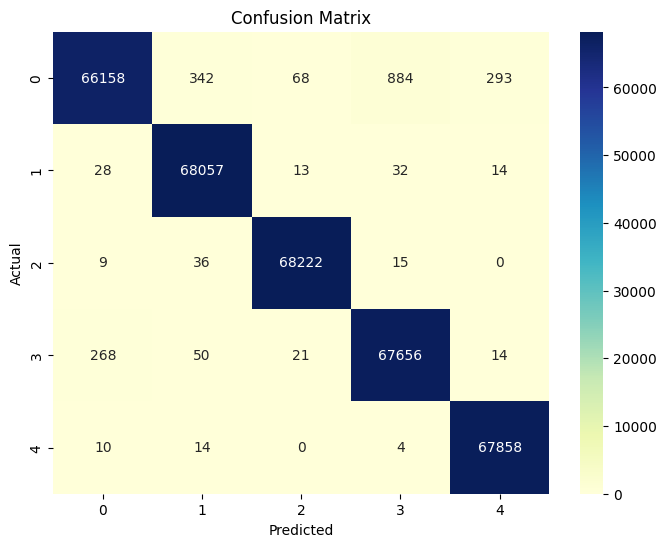

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, final_pred)

# Get the class labels
class_labels = np.unique(y_test)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

In [13]:
print("Confusion Matrix of Hybrid KNN-LSTM Model") 
confusion_matrix(y_test, final_pred)

Confusion Matrix of Hybrid KNN-LSTM Model


array([[66158,   342,    68,   884,   293],
       [   28, 68057,    13,    32,    14],
       [    9,    36, 68222,    15,     0],
       [  268,    50,    21, 67656,    14],
       [   10,    14,     0,     4, 67858]])